# DYAMOND LLC2160 Atmospheric Dataset Notebook


```{image} ../thumbnails/nsdf.png
:alt: NSDF logo
:width: 180px
```
```{image} ../thumbnails/pelican.jpeg
:alt: Pelican Platform logo
:width: 100px
:height: 100px
```


The `DYnamics of the Atmospheric general circulation Modeled On Non-hydrostatic Domains (DYAMOND)` data provides high resolution ocean circulation models, offering unprecedented detail. This dataset comprises a C1440 configuration of the Goddard Earth Observing System (GEOS) atmospheric model, with 7-km horizontal grid spacing and 72 vertical layers, coupled to a LLC2160 configuration of the Massachusetts Institute of Technology general circulation model (MITgcm) with 2–4-km grid spacing and 90 vertical levels. The C1440-LLC2160 simulation has been integrated for 14 months, starting from prescribed initial conditions on January 20, 2020.

This notebook is the second part of the `DYAMOND LLC2160 Ocean Dataset Cookbook`.

---

## Overview

This notebook demonstrates how to access and visualize high-resolution atmospheric data from the DYAMOND dataset using OpenVisus. The data is hosted in OSDF and served using Pelican Platform and OpenVisus. You'll learn how to read metadata from the cloud, interactively select variables, and explore regional and depth-based slices of the data.

1. Read the metadata file from cloud  
2. Data Subset  
3. Visualize the data  
4. Explore multi-resolution data for a specific region and depth  

By the end of this notebook, you will understand how to:
- Stream and query oceanographic data using PelicanFS
- Use metadata to inform data exploration
- Visualize regional and depth-specific ocean data using Panel and Bokeh


---

## Prerequisites

This section was inspired by [this template](https://github.com/alan-turing-institute/the-turing-way/blob/master/book/templates/chapter-template/chapter-landing-page.md) of the wonderful [The Turing Way](https://the-turing-way.netlify.app) Jupyter Book.

| Concepts | Importance | Notes |
| --- | --- | --- |
| [OpenVisus](https://github.com/sci-visus/OpenVisus) | Helpful | Required for multiresolution data access and streaming |
| Oceanographic data formats and interpretation | Helpful | Understanding of gridded climate/ocean data such as LLC2160 |
| [PelicanFS](https://github.com/PelicanPlatform/pelican) | Helpful | Used for high-performance data access from cloud storage |

- **Time to learn**: 30 minutes  
- **System requirements**:  
  - Python packages: `panel`, `bokeh`, `xmltodict`, `colorcet`, `boto3`, `basemap`, `pelicanfs`, `OpenVisus`, `openvisuspy`  
  - Recommended: Python ≥ 3.8, internet access for cloud-hosted data


---

shape (1, 360, 360) dtype float32
min/mean/max -54.90625 -8.920419692993164 89.96875
sample values [[-33.28125  -33.4375   -33.78125 ]
 [-33.953125 -33.90625  -34.09375 ]
 [-34.484375 -34.328125 -34.359375]]


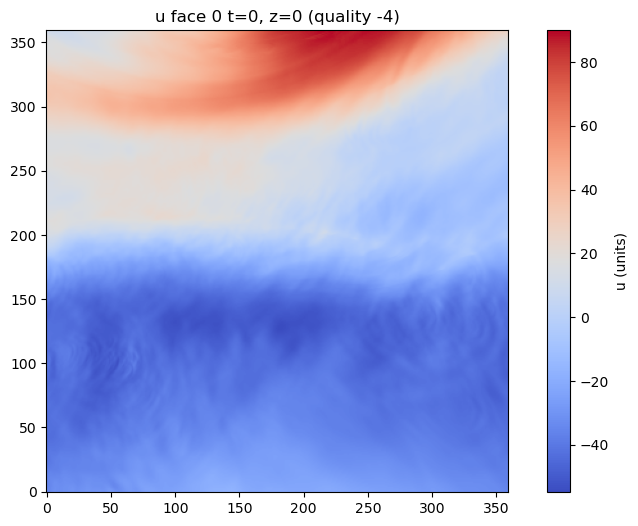

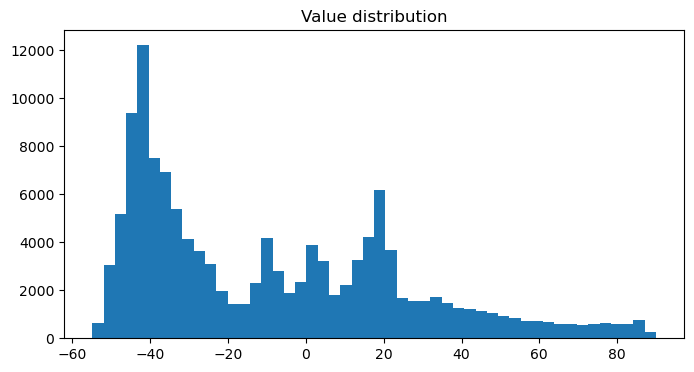

In [6]:
import numpy as np, matplotlib.pyplot as plt
import openvisuspy as ovp

variable = "u"
face = 0
timestep = 0
base_url = "pelican://osg-htc.org/nasa/nsdf/climate3/dyamond/GEOS/"
var_dir = f"GEOS_{variable.upper()}/{variable.lower()}_face_{face}_depth_52_time_0_10269.idx"
db = ovp.LoadDataset(base_url + var_dir)

# small, low-res read: first level, coarse quality
data = db.db.read(time=timestep, z=[0, 1], quality=-4)  # shape (1, Y, X)

print("shape", data.shape, "dtype", data.dtype)
print("min/mean/max", float(data.min()), float(data.mean()), float(data.max()))
print("sample values", data[0, :3, :3])

plt.figure(figsize=(10, 6))
plt.imshow(data[0], origin="lower", cmap="coolwarm")
plt.colorbar(label=f"{variable} (units)")
plt.title(f"{variable} face {face} t={timestep}, z=0 (quality -4)")
plt.show()

# optional: histogram to see distribution
plt.figure(figsize=(8,4))
plt.hist(data.ravel(), bins=50)
plt.title("Value distribution")
plt.show()


# **Step 1: Importing the libraries**

In [1]:
import numpy as np
import openvisuspy as ovp
import matplotlib.pyplot as plt

### The section below shows different LLC2160 fields we have available in cloud. Each field is >200TB.

In [2]:
variable = 'u'
face=0 # 6 variables are available
timestep=1 # There are 10000 timesteps available

In [3]:
base_url= "pelican://osg-htc.org/nasa/nsdf/climate3/dyamond/GEOS/"
var_dir=f"GEOS_{variable.upper()}/{variable.lower()}_face_{face}_depth_52_time_0_10269.idx"
var_url=base_url+var_dir

## **Step 2: Reading the metadata file from cloud**
In this section, you can select any variables that you can declared in the cells above and replace it inside `LoadDataset`. We are just reading the metadata for the dataset here.

In [4]:
db=ovp.LoadDataset(var_url)
print(f'Dimensions: {db.getLogicBox()[1][0]}*{db.getLogicBox()[1][1]}*{db.getLogicBox()[1][2]}')
print(f'Total Timesteps: {len(db.getTimesteps())}')
print(f'Field: {db.getField().name}')
print('Data Type: float32')

Dimensions: 1440*1440*52
Total Timesteps: 10269
Field: u
Data Type: float32


## **Step 3:  Data Selection**
This section shows you how to load the data you want. You can select any timestep, region (x,y,z) you want. You can set the quality or resolution of the data as well. Higher quality means the finer(more) data. Not setting any time means first timestep available. Not setting quality means full data which takes a while to load because of the higher filesize.  Since each timestep is >30GB, I am only selecting 1 level out of 90.

In [5]:
data=db.db.read(time=0,z=[0,1],quality=-4) #Since each timestep is >30GB, I am only selecting 1 level out of 90.
data.shape

(1, 360, 360)

## **Step 4:  Visualize the data**
We are using a simple matplotlib here, but since the data is in numpy array, it can loaded with any python modules that support numpy. Feel free to set the `vmin`,`vmax` appropriately.

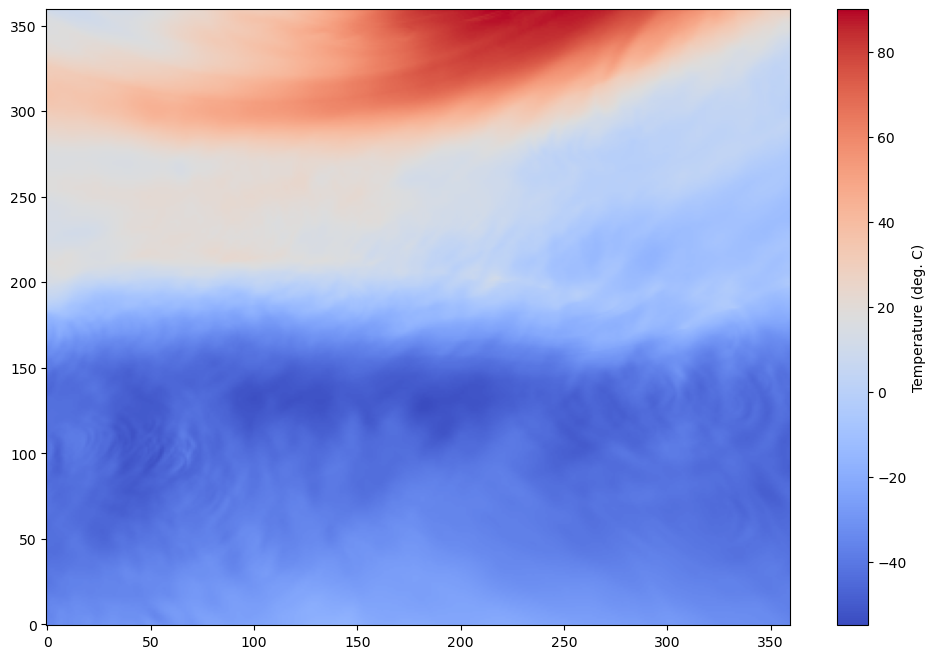

In [6]:
fig,axes=plt.subplots(1,1,figsize=(12,8))
im= axes.imshow(data[0,:,:], aspect='auto',origin='lower',cmap='coolwarm')
cbar = plt.colorbar(im, ax=axes)
cbar.set_label('Temperature (deg. C)')
plt.show()

### Reference


This data is a product of DYAMOND initiative. Please find more information <a href='https://gmao.gsfc.nasa.gov/gmao-products/dyamond-phase-ii/' target='_blank'>here</a>.

### *Please reach out to Aashish Panta, Giorgio Scorzelli or Valerio Pascucci for any concerns about the notebook. Thank you!*
- Aashish Panta (aashishpanta0@gmail.com)
- Giorgio Scorzelli (scrgiorgio@gmail.com)
- Valerio Pascucci (pascucci.valerio@gmail.com)

---